In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
com=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Company_Data.csv')
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
# descriptive analysis and neccessary EDA
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
com.shape

(400, 11)

In [5]:
com.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [6]:
# checking for null values
com.isna().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [7]:
# checking for duplicated values
com[com.duplicated]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [8]:
com['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [9]:
com['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

<Axes: xlabel='ShelveLoc', ylabel='count'>

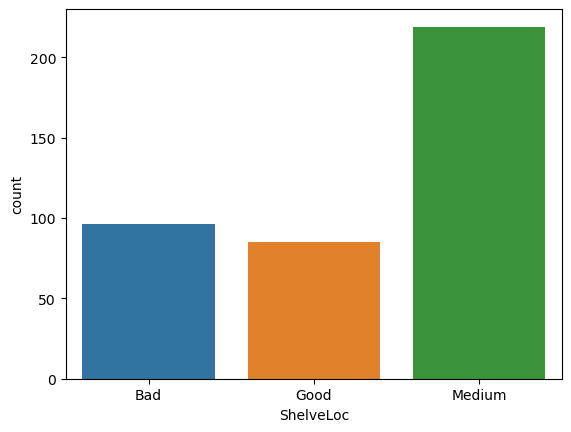

In [10]:
sns.countplot(com,x='ShelveLoc')

<Axes: xlabel='Urban', ylabel='count'>

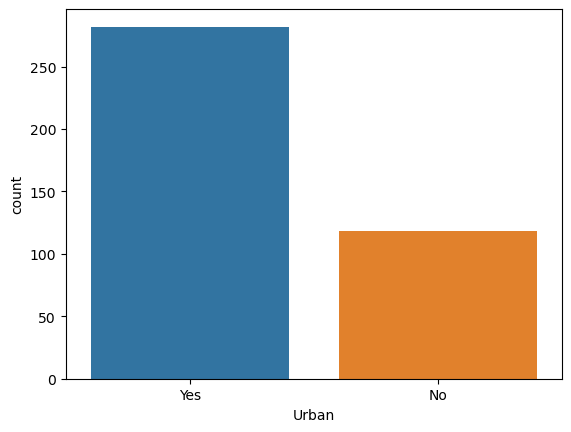

In [11]:
sns.countplot(com,x='Urban')

<Axes: ylabel='ShelveLoc'>

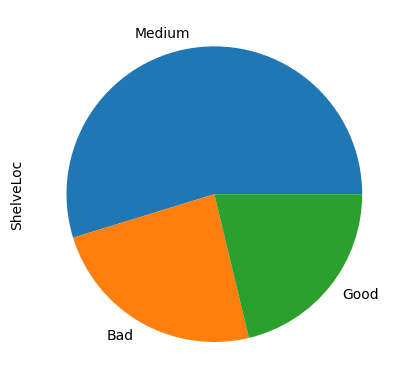

In [12]:
com['ShelveLoc'].value_counts().plot(kind='pie')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

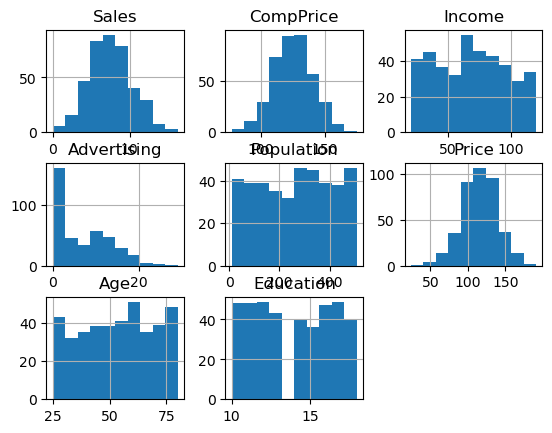

In [13]:
com.hist()
plt.tight_layout

C:\Users\bivin\AppData\Local\Temp\ipykernel_13868\1685231250.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(com.corr(),annot=True)


<Axes: >

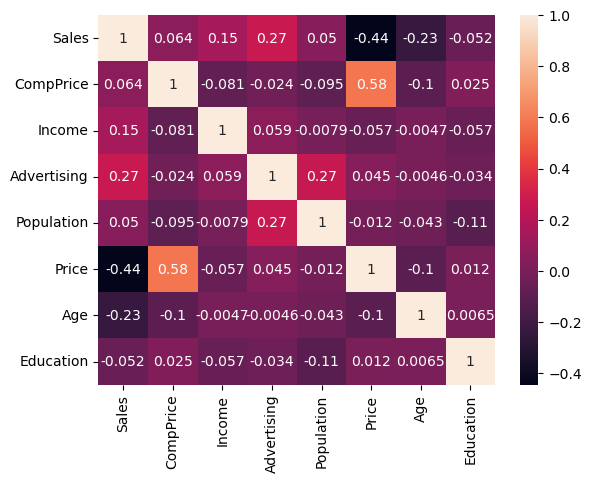

In [14]:
# correlation analysis
sns.heatmap(com.corr(),annot=True)

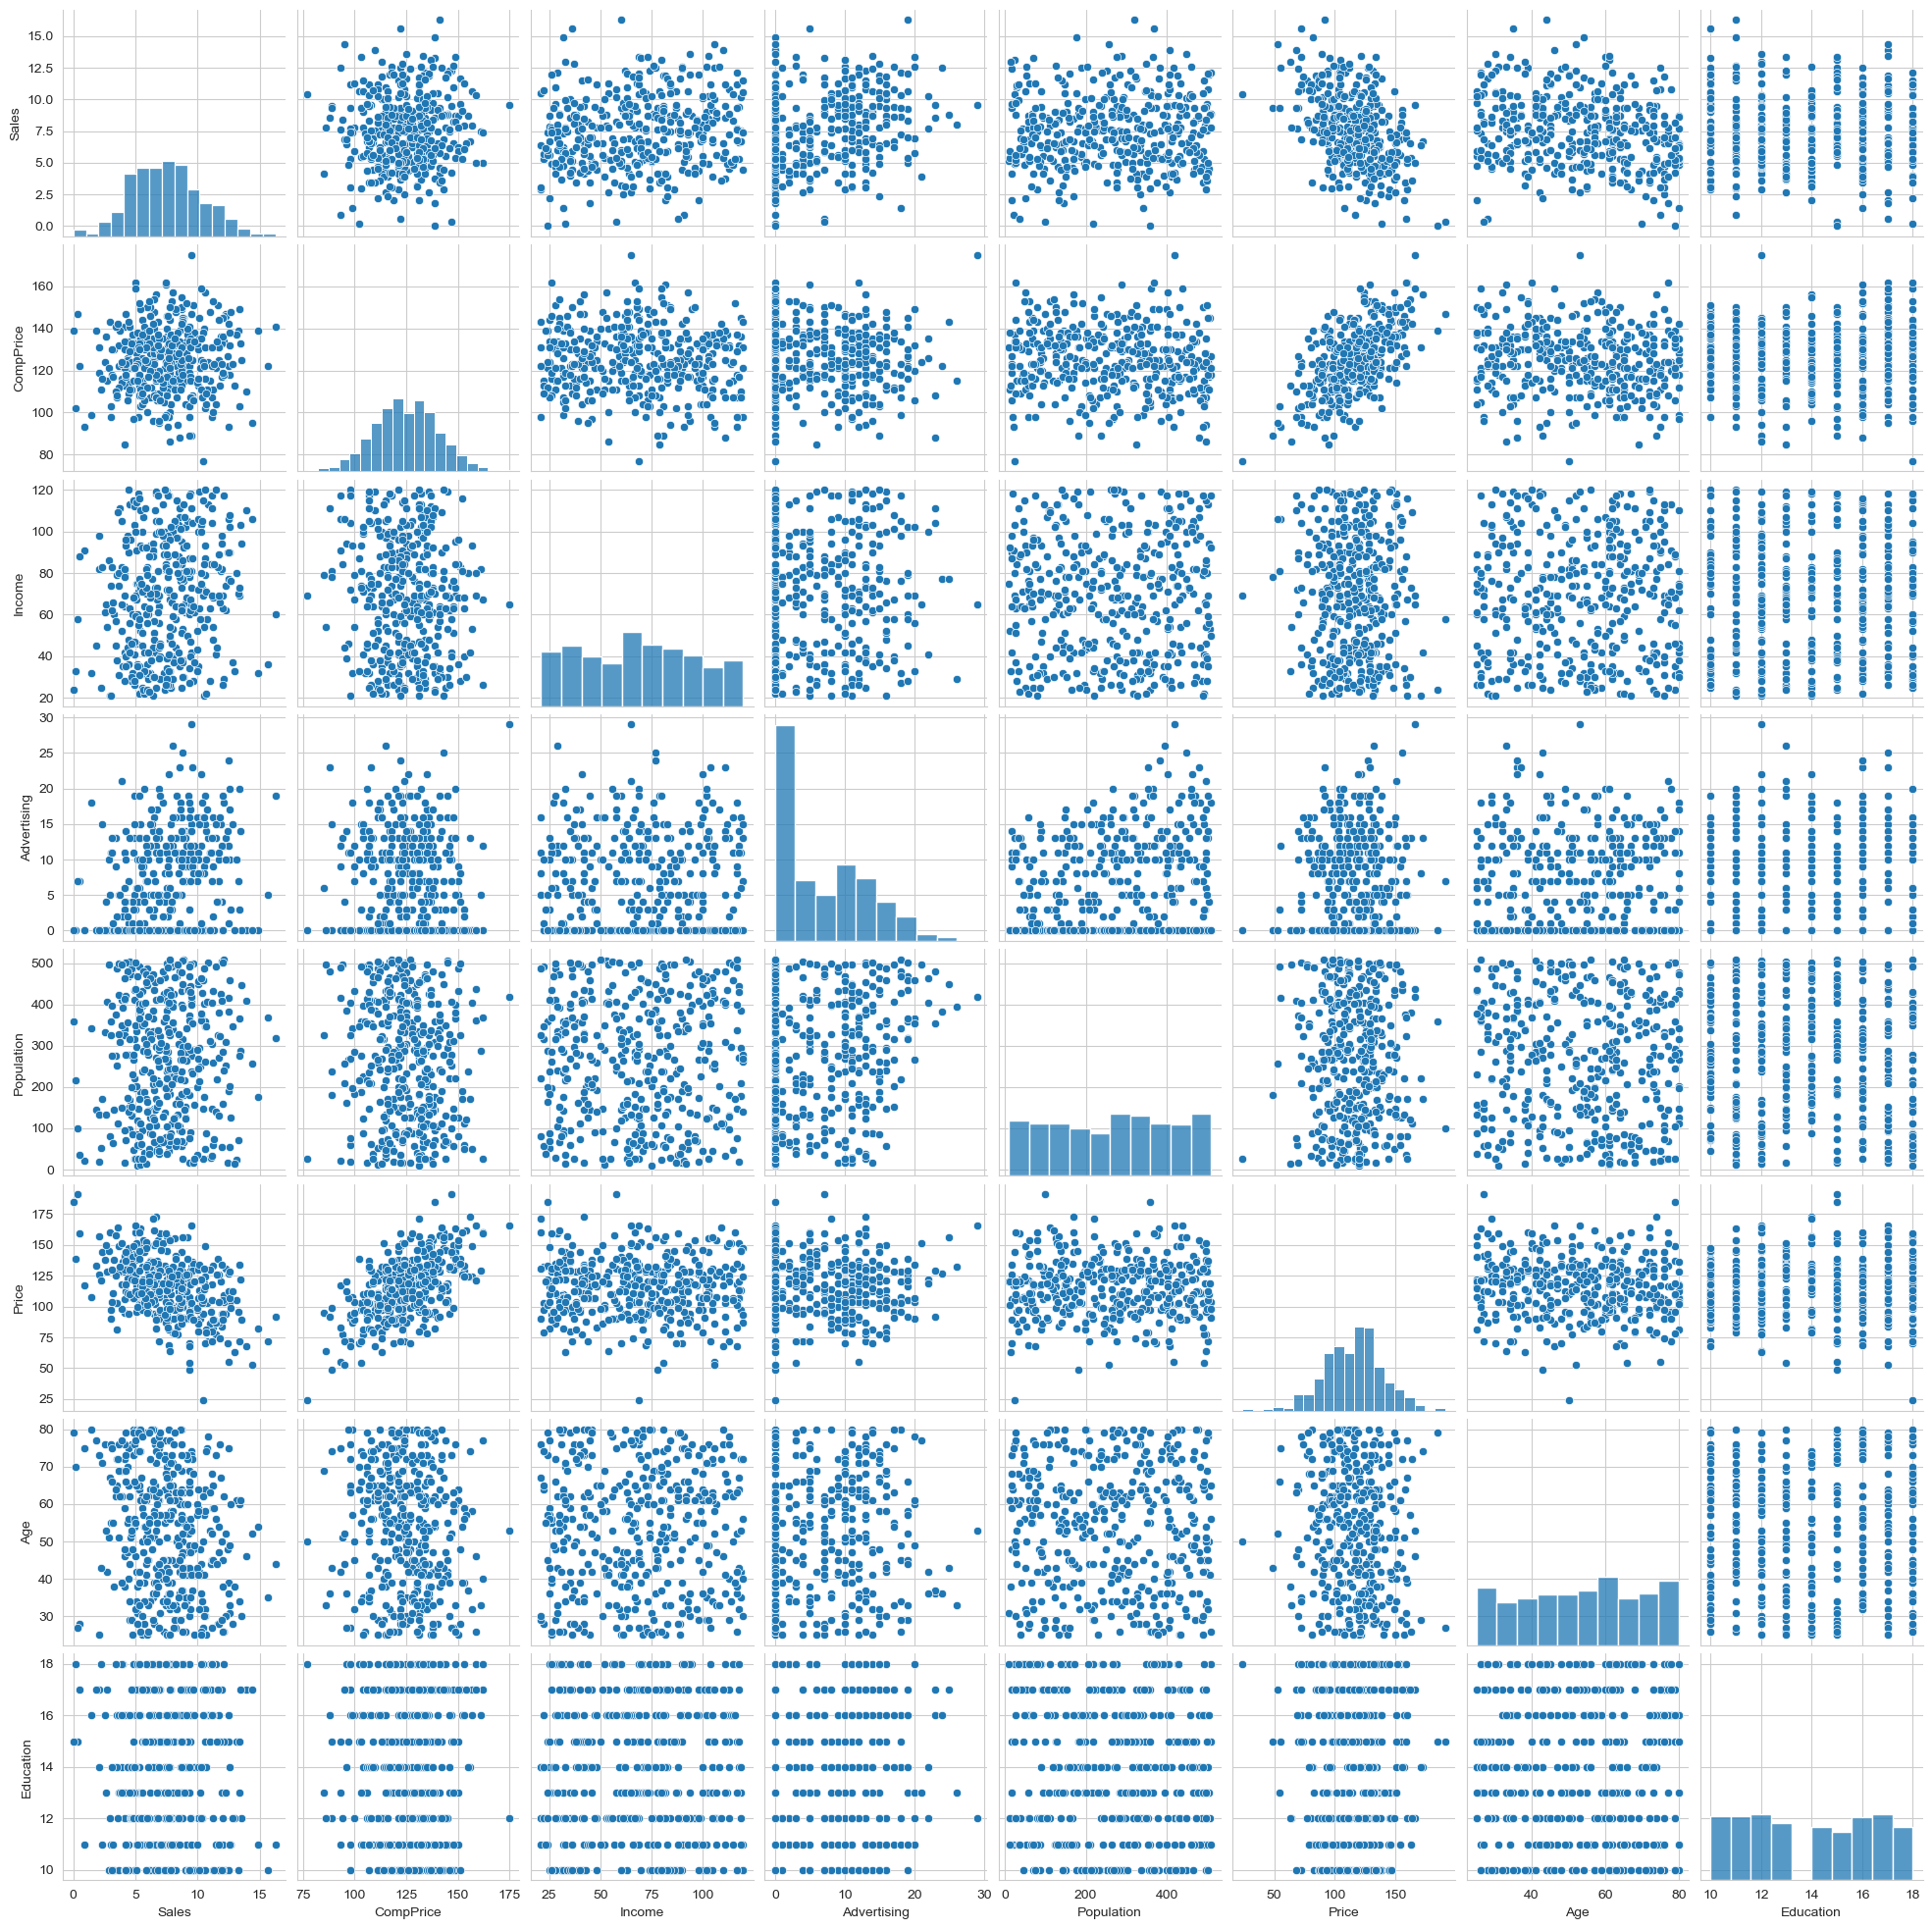

In [15]:
sns.set_style(style='whitegrid')
sns.pairplot(com)

In [16]:
# feature engineering
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
com['ShelveLoc']=le.fit_transform(com['ShelveLoc'])
com['Urban']=le.fit_transform(com['Urban'])
com['US']=le.fit_transform(com['US'])
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [19]:
com['Sales'].mean()

7.496325000000001

In [20]:
sales_value=[]
for v in com['Sales']:
    if v<=7.49:
        sales_value.append('low')
    else:
        sales_value.append('high')

In [21]:
com['Sales value']=sales_value

In [22]:
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales value
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


In [23]:
## train test split
from sklearn.model_selection import train_test_split

In [24]:
x=com.drop(['Sales','Sales value'],axis=1)
y=com[['Sales value']]

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=42)

In [26]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(280, 10)
(120, 10)
(280, 1)
(120, 1)


## model building using entropy criteria

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=4)

In [29]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

In [30]:
ypred=dt.predict(xtest)
pd.DataFrame(ypred)

,0
0,low
1,low
2,high
3,low
4,high
...,...
115,high
116,low
117,low
118,low


In [31]:
dt.score(xtrain,ytrain)

0.7714285714285715

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        high       0.78      0.55      0.65        65
         low       0.61      0.82      0.70        55

    accuracy                           0.68       120
   macro avg       0.70      0.69      0.67       120
weighted avg       0.70      0.68      0.67       120



[]

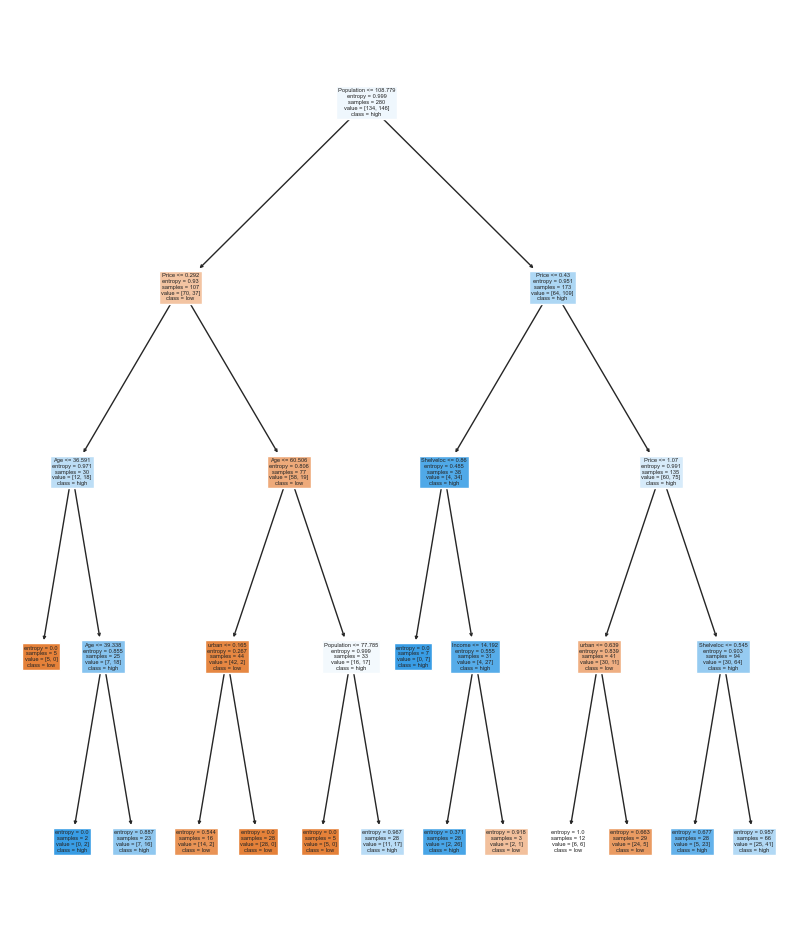

In [34]:
plt.figure(figsize=(10,12))
from sklearn import tree
tree.plot_tree(dt,feature_names=['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Shelveloc', 'urban', 'US'],class_names=['low', 'high'],filled=True)
plt.plot()

In [35]:
## for improving model accuracy try hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [36]:
params={
    'criterion':['entropy','gini'],
    'max_depth':[1,2,3,4,5,6],
    'splitter':['best','random']
}

In [37]:
gs=GridSearchCV(dt,params)

In [38]:
gs.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              splitter='random'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [39]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}

In [40]:
dt1=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=6)

In [41]:
dt1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [42]:
ypred1=dt1.predict(xtest)
pd.DataFrame(ypred1)

,0
0,high
1,low
2,high
3,low
4,high
...,...
115,high
116,high
117,high
118,low


In [43]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

        high       0.75      0.77      0.76        65
         low       0.72      0.69      0.70        55

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.73      0.73       120



In [44]:
## accuracy improved to 73%

In [45]:
from sklearn import tree

In [46]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

[]

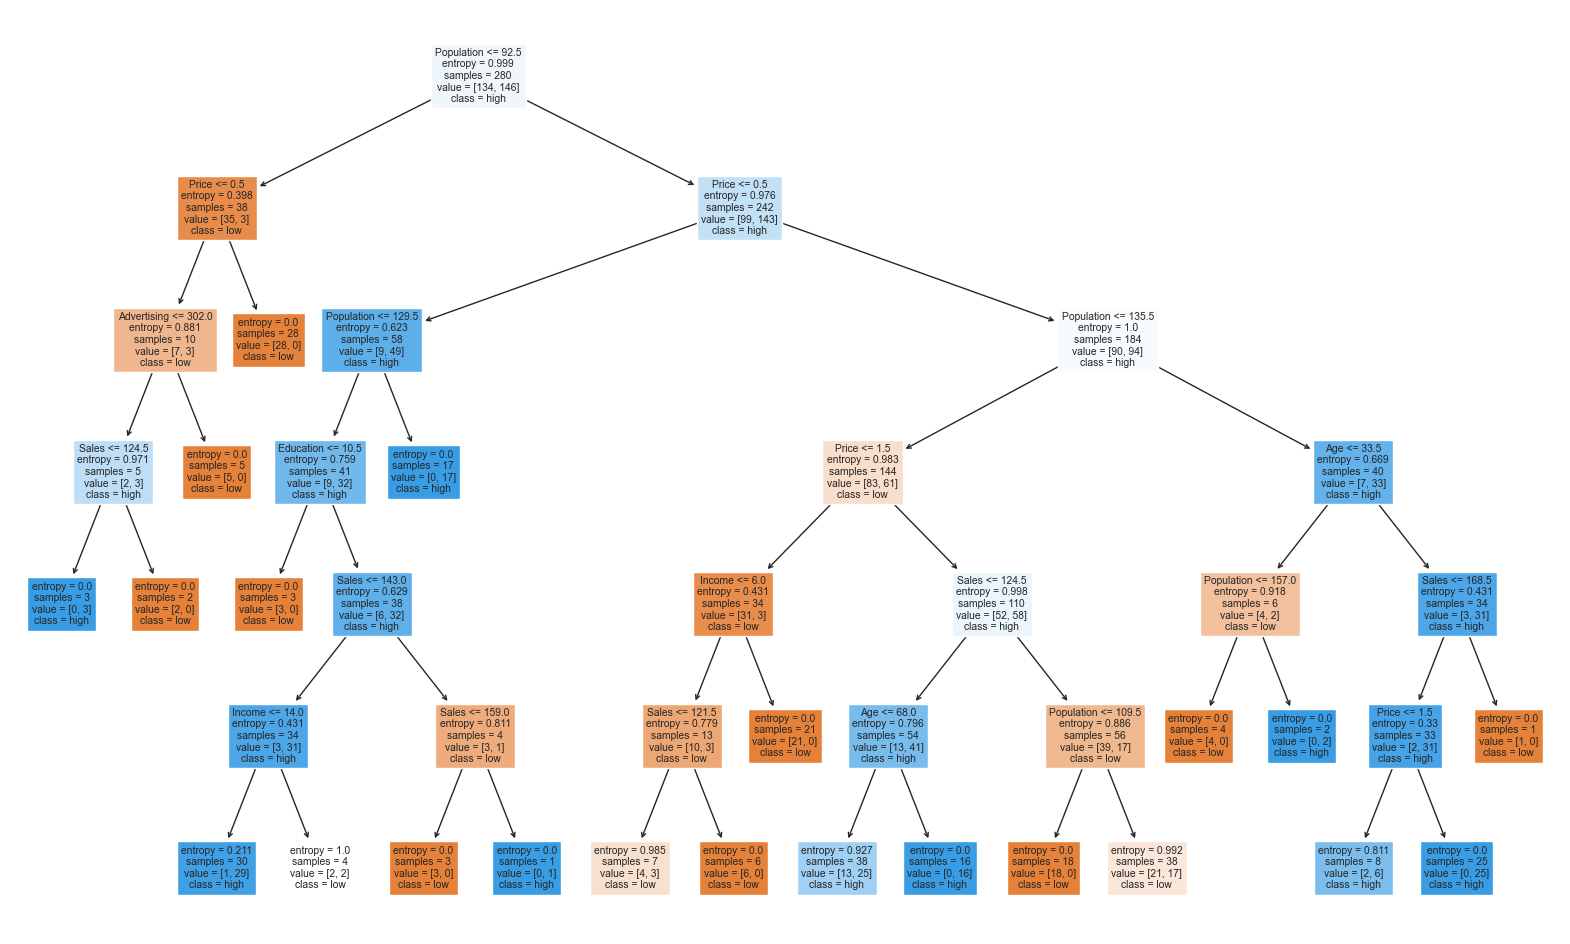

In [51]:
plt.figure(figsize=(20,12))
tree.plot_tree(dt1,feature_names=['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Shelveloc', 'urban', 'US'],class_names=['low','high'],filled=True)
plt.plot()

In [48]:
# build a model using gini crietria
dt2=DecisionTreeClassifier(criterion='gini')
dt2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [49]:
predict=dt2.predict(xtest)

In [50]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

        high       0.74      0.66      0.70        65
         low       0.65      0.73      0.68        55

    accuracy                           0.69       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.70      0.69      0.69       120



In [ ]:
 # entropy criteria has maximum accuracy